# Diagnose Breast Cancer  

In this project, collinearity issues were first addressed by removing some features and PCA was applied to reduce the dimensionality. Then, reduced data is used to build models for prediction of breat cancer. The models I compared included K-nearest Neighbors, Support Vector Classifier and Logistic Regression.

## 1. Importing Libraries & Loading Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.grid_search import GridSearchCV

from sklearn import cross_validation as cv
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

D:\Anaconda\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# load the raw data
bc=pd.read_csv("E:/Data Science/Experience/Breast Cancer Wisconsin/data.csv")

## 2. Exploratory Data Analysis

In [3]:
bc.head() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
bc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
# slice out the predictor features
P=bc.iloc[:,2:32]
bc.iloc[:,2:32].describe() 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


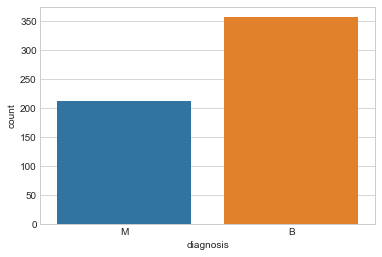

In [6]:
#count the number of malignant tumor vs benign tumor
y = bc.diagnosis  
ax = sns.countplot(y,label="Count")      
B, M = y.value_counts()

#### Identifying Collinearity

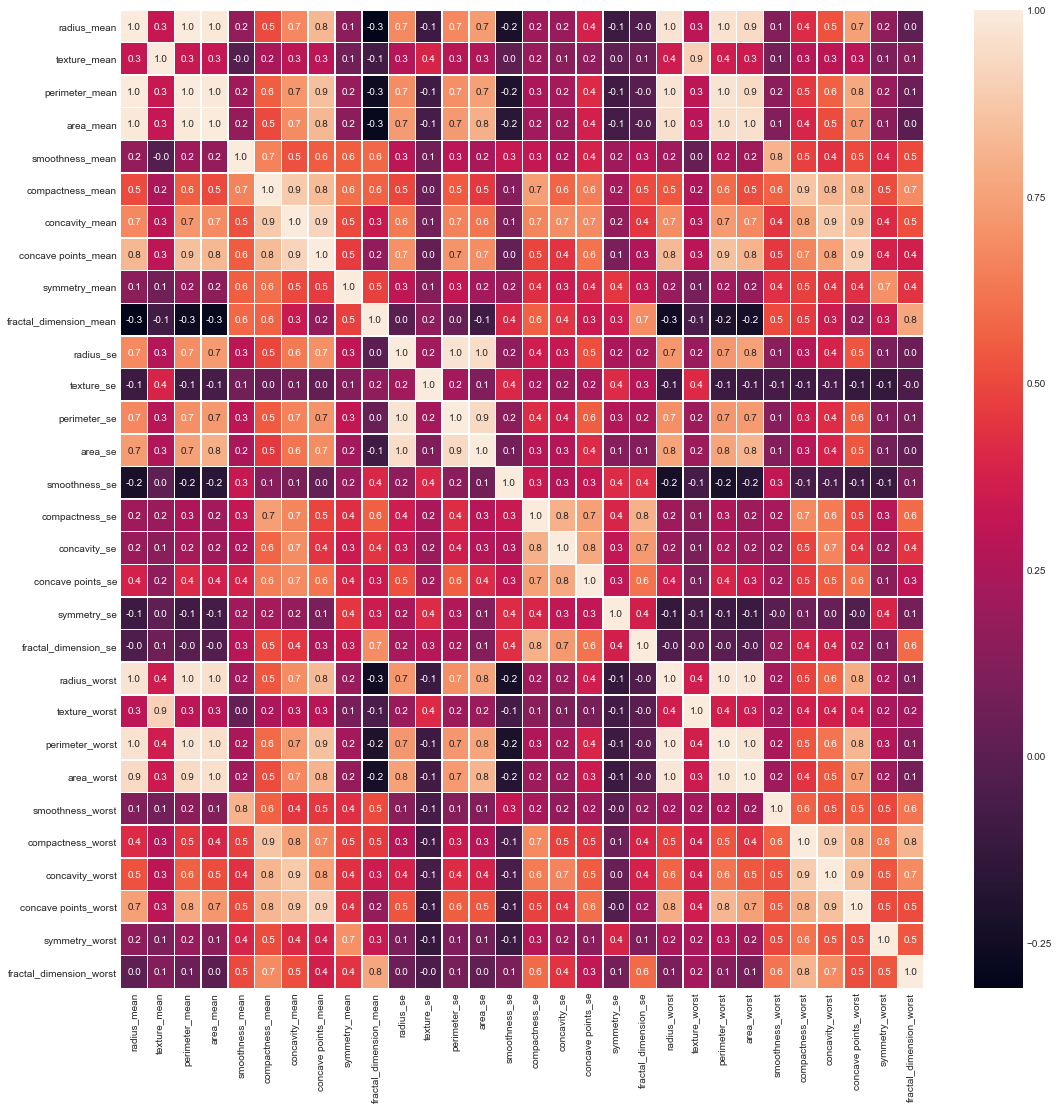

In [7]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(P.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

* From the heatmap plot, I found radius, area and perimeter features (columns 0, 2, 3, 10, 12, 13, 20, 22 and 23) are highly correlated. This makes sense because area and perimeter are computed from radius. So I kept radius features, and discarded perimeter and area features for model building and prediction.

In [8]:
# use pandas get_dummies function to convert the qualitative to quantitative 
yd=pd.get_dummies(bc.diagnosis)
y=yd.M
y.head()

0    1
1    1
2    1
3    1
4    1
Name: M, dtype: uint8

## 3. Reduction of Dimensionality using Principal Component Analysis (PCA)

PCA is a technique that extracts a smaller but valuable set of features by linear combination of the original features. The new set of features captures as much information as possible usually 95% or more. I apply PCA to the original data, and different versions of it and try to understand how results from PCA vary. 

### 3.1 PCA on original data

In [9]:
pca=PCA(n_components=10)
x_pca=pca.fit_transform(P)
print (x_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())
loadings = pca.components_

(569, 10)
[  9.82044672e-01   1.61764899e-02   1.55751075e-03   1.20931964e-04
   8.82724536e-05   6.64883951e-06   4.01713682e-06   8.22017197e-07
   3.44135279e-07   1.86018721e-07]
0.999999894684


* The above result shows more than 95% of the variance in the data can be collected by the first component. This happens in cases where there is high collinearity. The presence of collinearity could cause the PCA to overemphasize the contribution of the variance from the highly correlated varibles and gives less weight to the variables to the uncorrelated variables. Finally this will influence the prediction.

### 3.2 PCA on standardized data

Standardization of unscaled raw data

In [10]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(P)
pca=PCA(n_components=0.95)
x_pca=pca.fit_transform(X_scaled)
print (x_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())
loadings = pca.components_

(569, 10)
[ 0.44272026  0.18971182  0.09393163  0.06602135  0.05495768  0.04024522
  0.02250734  0.01588724  0.01389649  0.01168978]
0.951568814337


* Above 10 components explain 95% of the variance in the data compared to only one on unstandardized data. Using the standardized data, PCA projects more features which are crucial to breast cancer prediction. We also can conclude that PCA with out standalization can hide features with smaller magnitude which are usable to the prediction. 

### 3.3. PCA after removing collinear features

PCA is applied on the standardized data after removing collinear features

In [11]:
# Remove area, perimeter,perimeter_worst, area_worst, perimeter_se, area_se (columns: 2,3,12,13,22,23,) 
scaler = StandardScaler()
P_scaled=scaler.fit_transform(P)
P_scaled=pd.DataFrame(P_scaled)
PP=P_scaled.drop(P_scaled.columns[[2, 3, 22, 23, 12, 13]], axis=1) 
pca=PCA(n_components=0.95)
P_pca=pca.fit_transform(PP)
print(P_pca.shape)
print(pca.explained_variance_ratio_) 
print(pca.explained_variance_ratio_.sum())

(569, 11)
[ 0.42661046  0.15932139  0.10294428  0.07788731  0.06489774  0.05015242
  0.02145044  0.0187846   0.01505759  0.01197751  0.01117206]
0.960255820189


Text(0.5,1,'PCA after removing collinearity')

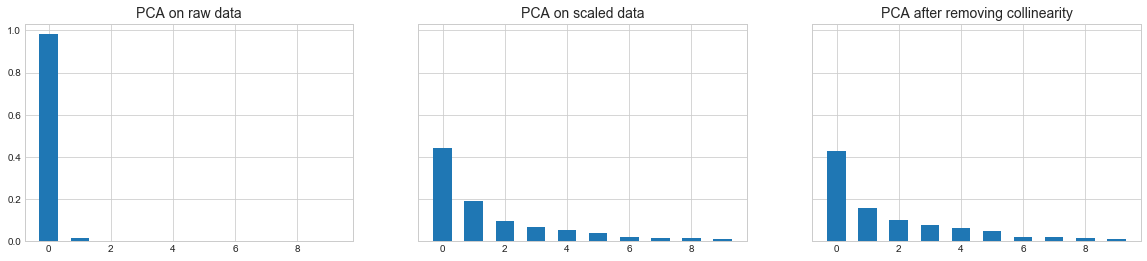

In [12]:
n=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
index = np.arange (10)

var_1=np.array([9.82044672e-01,1.61764899e-02,1.55751075e-03,1.20931964e-04,8.82724536e-05,6.64883951e-06,4.01713682e-06,8.22017197e-07,3.44135279e-07,1.86018721e-07])                
var_sc=np.array([0.44272026,0.18971182,0.09393163,0.06602135,0.05495768,0.04024522,0.02250734,0.01588724,0.01389649,0.01168978])
var_sc_coll=np.array([0.42661046,0.15932139,0.10294428,0.07788731,0.06489774,0.05015242,0.02145044,0.0187846,0.01505759,0.01197751])
var=np.vstack([var_1,var_sc,var_sc_coll]).T

# create pandas datframe from numpy array 'var'
df=pd.DataFrame(var,index=n,columns=['original','scaled','scaled_no_colli'])

# plot variance data 
fig, ax= plt.subplots(1,3,sharey=True,figsize=(20,4))

r1 = ax[0].bar(index,df['original'],width = 0.6,align='center')
ax[0].set_title('PCA on raw data',fontsize=14)

r2 = ax[1].bar(index,df['scaled'],width = 0.6,align='center')
ax[1].set_title('PCA on scaled data',fontsize=14)

r3 = ax[2].bar(index,df['scaled_no_colli'],width= 0.6,align='center')
ax[2].set_title('PCA after removing collinearity',fontsize=14)

* After standardizing the data, PCA performance improved quite well in capturing variance of the raw data.
* After removing collinear features allowed the variance from other variances which were previously ignored to be captured by PCA.

#### Plot the first two components against diagnosis

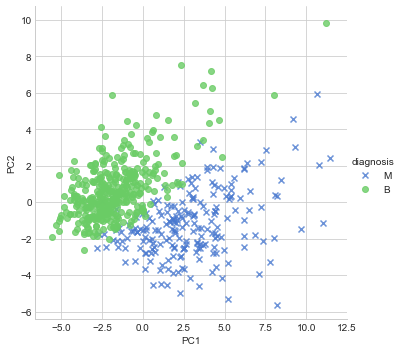

In [13]:
#plotting the first 2 compenents vs diagnosis
n=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','diagnosis']
d=bc.iloc[:,1:2] 
Xy=pd.DataFrame(np.hstack([P_pca,d.as_matrix()]),columns=n)
sns.lmplot("PC1", "PC2", hue="diagnosis", data=Xy, fit_reg=False,markers=["x", "o"],palette="muted")
plt.show()

## 4. Modeling 
From the above plot, we can see that the benign and malignant tumors have fairly distinctive regions, this makes it easier for me to fit linear or non-linear classifiers to model the problem. Below, **k-nearest Neighbors(KNN), Support Vector Machine(SVM) and Logistic Regression** models are fit to the data and later results are compared.

#### Split training and test data

In [14]:
#predictor X
X=(Xy.iloc[:,0:11]).as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### 4.1. KNN

**Parameter tuning and optimizing the number of neighbors (k)**
* For optimization purposes it is suggested using the training data
* for performance estimation or to figure out the best model, the test data will be used

In [15]:
knn=KNeighborsClassifier()

[ 0.924  0.874  0.937  0.924  0.943  0.925  0.925  0.912  0.918  0.906
  0.906  0.887  0.9    0.887  0.893  0.874  0.893  0.868  0.887  0.868
  0.887  0.875  0.887  0.875  0.881  0.874  0.893  0.862  0.862  0.856
  0.875  0.855  0.862  0.855  0.862  0.849  0.862  0.843  0.85   0.843
  0.843  0.83   0.837  0.83   0.843  0.83   0.837  0.837  0.837]


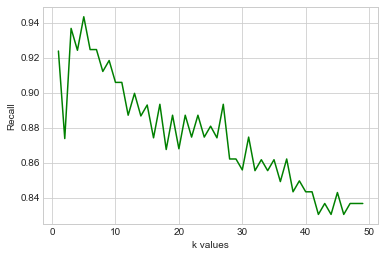

In [16]:
k_range=list(range(1,50))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train,y_train,cv=10,scoring='recall')
    k_scores.append(scores.mean())
print(np.round(k_scores,3)) 
plt.plot(k_range,k_scores,color="green")
plt.xlabel('k values')
plt.ylabel('Recall')
plt.show()

* From the above plot the optimal k value is around 5.

In [17]:
k_range=list(range(1,50))
param_grid=dict(n_neighbors=k_range)
scores = ['accuracy', 'recall'] 
for sc in scores:
    grid_knn=GridSearchCV(knn,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid_knn.fit(X_train,y_train)
    print(grid_knn.best_params_)
    print(np.round(grid_knn.best_score_,3))

# Tuning hyper-parameters for accuracy
{'n_neighbors': 6}
0.96
# Tuning hyper-parameters for recall
{'n_neighbors': 5}
0.943


* optimal n_neighbors according to recall score (sensitivity) is selected i.e.k=5.

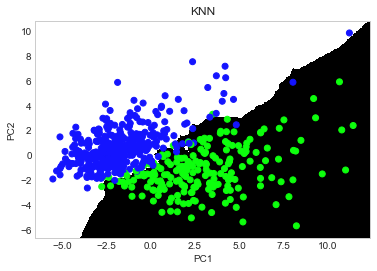

In [18]:
# fit the optimal model onto training data
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# To display, we fit the model on the first two components 
knn.fit(X_train[:,0:2], y_train)

# Plot the decision boundary and creat color map
cmap_light = ListedColormap(['#ffffff','#000000'])
cmap_bold = ListedColormap(['#1414ff','#0dff0d'])

# creating a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(xy_mesh)
%matplotlib inline
Z = Z.reshape(xx.shape)

#plotting data on decision boundary
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax=plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max());plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('KNN')
plt.show()

### 4.2. SVM

In [19]:
svc=SVC()
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5],'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
scores = ['accuracy', 'recall']
for sc in scores:
    grid=GridSearchCV(svc,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid.fit(X_train,y_train)
    print(grid.best_params_)
    print(np.round(grid.best_score_,3))

# Tuning hyper-parameters for accuracy
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.979
# Tuning hyper-parameters for recall
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.962


* Using accuracy and recall as scoring metrics, both give the same model as optimal i.e. {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}.

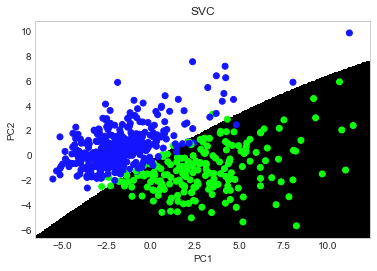

In [20]:
# fit the optimal model onto the training data
svc=SVC(C=100,gamma=0.001,kernel='rbf')
svc.fit(X_train, y_train)

# To display, we fit the model on the first two components 
svc.fit(X_train[:,0:2], y_train)

# Plot the decision boundary and creat color map
cmap_light = ListedColormap(['#ffffff','#000000'])
cmap_bold = ListedColormap(['#1414ff','#0dff0d'])

# creating a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = svc.predict(xy_mesh)
Z = Z.reshape(xx.shape)

#plotting data on decision boundary
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('SVC')
plt.show()

### 4.3. Logistic Regression

In [21]:
lgr = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
scores = ['accuracy', 'recall']
for sc in scores:
    grid_lgr=GridSearchCV(lgr,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid_lgr.fit(X_train,y_train)
    print(grid_lgr.best_params_)
    print(np.round(grid_lgr.best_score_,3))

# Tuning hyper-parameters for accuracy
{'C': 0.1}
0.979
# Tuning hyper-parameters for recall
{'C': 1}
0.962


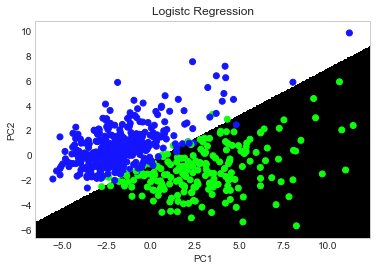

In [22]:
# fit the optimal model onto the training data
lgr=LogisticRegression(C=1)
lgr.fit(X_train, y_train)

# To display, we fit the model on the first two components 
lgr.fit(X_train[:,0:2], y_train)

# Plot the decision boundary and creat color map
cmap_light = ListedColormap(['#ffffff','#000000'])
cmap_bold = ListedColormap(['#1414ff','#0dff0d'])

# creating a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = lgr.predict(xy_mesh)
Z = Z.reshape(xx.shape)

#plotting data on decision boundary
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('Logistc Regression')
plt.show()

* SVC and Logistic regression scored similar performance, but I should be careful since the model has not yet tested on test data. Below, I fit the three models onto the test data and compare the predictions with observations.

### 4.4. Model Selection

KNN:
 confusion matrix
 [[89  1]
 [ 5 48]] 


Confusion matrix plot of KNN classifier


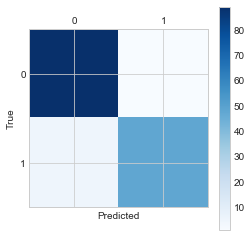


 Classification report 
              precision    recall  f1-score   support

          0       0.95      0.99      0.97        90
          1       0.98      0.91      0.94        53

avg / total       0.96      0.96      0.96       143

#############################################################################
SVC:
 confusion matrix
 [[89  1]
 [ 3 50]] 


Confusion matrix plot of SVC


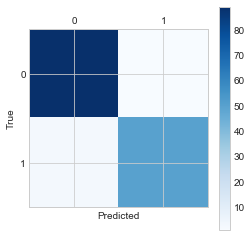


 Classification report 
              precision    recall  f1-score   support

          0       0.97      0.99      0.98        90
          1       0.98      0.94      0.96        53

avg / total       0.97      0.97      0.97       143

#############################################################################
Logistic Regression:
 confusion matrix
 [[89  1]
 [ 3 50]] 


Confusion matrix plot of Logistic regression

 Classification report 
              precision    recall  f1-score   support

          0       0.97      0.99      0.98        90
          1       0.98      0.94      0.96        53

avg / total       0.97      0.97      0.97       143



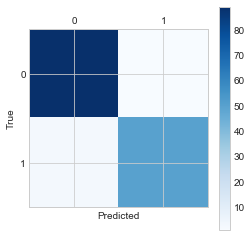

In [23]:
# fit the knn model on the training data and predict for test data
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn =knn.predict(X_test)

# compute and plot confusion matrix
c_m = confusion_matrix(y_test, y_pred_knn)
print('KNN:\n confusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Blues)
print('Confusion matrix plot of KNN classifier')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# report classification 
print('\n Classification report \n',classification_report(y_test, y_pred_knn))
print ('#############################################################################')

# fit the SVC model on the training data and predict for test data
svc=SVC(C=100,gamma=0.001,kernel='rbf',probability=True)
svc.fit(X_train, y_train)
y_pred_svc =svc.predict(X_test)

# compute and plot confusion matrix
c_m = confusion_matrix(y_test, y_pred_svc)
print('SVC:\n confusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Blues)
print('Confusion matrix plot of SVC')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# report classification 
print('\n Classification report \n',classification_report(y_test, y_pred_svc))
print ('#############################################################################')

# fit the logistic regression model on the training data and predict for test data
lgr=LogisticRegression(C=1)
lgr.fit(X_train, y_train)
y_pred_lgr =lgr.predict(X_test)

# compute and plot confusion matrix
c_m = confusion_matrix(y_test, y_pred_lgr)
print('Logistic Regression:\n confusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Blues)
print('Confusion matrix plot of Logistic regression')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')

# report classification
print('\n Classification report \n',classification_report(y_test, y_pred_lgr))

* The SVM and logistic regression performances are equal. Choosing either of the models is based on the other factors, such as simplicity in parameter tuning and ease of interpretation.

#### Effect of classification threshold on model performance
Threshold of 0.5 is used by default to convert predicted probabilities to class predictions. Threshold can be tuned to increase sensitivity or recall. 

model: KNN
thresholds: [ 2.   1.   0.8  0.6  0.4  0.2  0. ]
tpr:        [ 0.     0.736  0.868  0.906  0.943  0.962  1.   ]
fpr:        [ 0.     0.011  0.011  0.011  0.044  0.222  1.   ]
model: SVC
thresholds: [ 1.     0.776  0.626  0.512  0.5    0.457  0.427  0.38   0.339  0.328  0.   ]
tpr:        [ 0.057  0.925  0.925  0.943  0.943  0.962  0.962  0.981  0.981  1.     1.   ]
fpr:        [ 0.     0.     0.011  0.011  0.022  0.022  0.033  0.033  0.044  0.044  1.   ]
model: Logistic
thresholds: [ 1.     0.737  0.616  0.565  0.461  0.429  0.427  0.375  0.024  0.023  0.   ]
tpr:        [ 0.019  0.925  0.925  0.943  0.943  0.962  0.962  0.981  0.981  1.     1.   ]
fpr:        [ 0.     0.     0.011  0.011  0.033  0.033  0.044  0.044  0.267  0.267  1.   ]


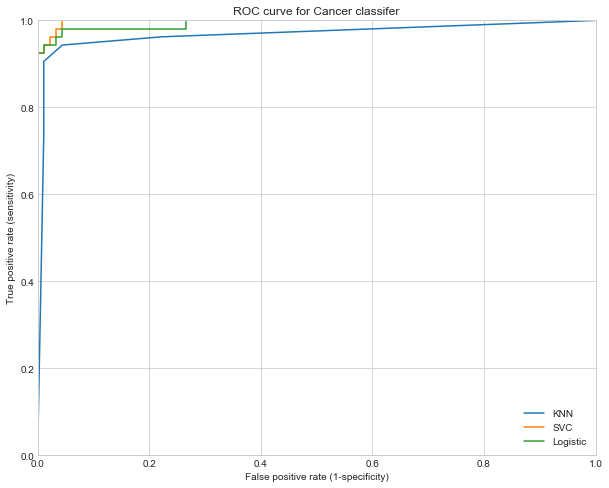

In [24]:
# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
y_pred_knn_p =knn.predict_proba(X_test)[:,1]
y_pred_svc_p =svc.predict_proba(X_test)[:,1]
y_pred_lgr_p =lgr.predict_proba(X_test)[:,1]

models=[y_pred_knn_p,y_pred_svc_p,y_pred_lgr_p]
label=['KNN','SVC','Logistic']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(3)
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    print('model:',label[m])
    print('thresholds:',np.round(thresholds,3))
    print('tpr:       ',np.round(tpr,3))
    print('fpr:       ',np.round(fpr,3))
    plt.plot(fpr,tpr,label=label[m])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for Cancer classifer')
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.legend(loc=4)

* KNN has the worst performance. SVC and Logistic regression seem to have the same performance when thresholds  >= 0.25. However, svc perform is better than logistic regression when thresholds < 0.25.
* Optimal model: svc with C=100, gamma=0.001, kernel=rbf.